# Instalacion de PaperMill en un entorno de python (Jupyter)

## Instalamos PaperMIll y JupyterLab

### a)  Creamos el ambiente en conda
conda create -n papermill python=3.7
### b)  Lo activamos
conda activate papermill 
### c)  Instalamos las librerias
pip install papermill pyowm jupyterlab pandas seaborn boto3 pdfkit
### d) Probamos
papermill -h

# Paso de parametros y creacion de reporte con PaperMill

# 1. Accedemos a la API de pyown
En los primeros pasos de nuestro análisis, obtendremos información meteorológica para la ciudad definida utilizando la API de Pyown.
La información se organizará en un diccionario y luego se cargará como un DataFrame de pandas para realizar el proceso de datos

In [58]:
import pyowm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pdfkit

## 1.1 Estableciendo la API key de PyOWM API y definiendo la variable
En esta primera parte del flujo de trabajo definimos la clave API para acceder al servicio OpenWeather y también la celda para contener el parámetro ciudad que se puede definir usando Papermill.

In [59]:
# Poner la API KEY otorgada por el sitio web (https://openweathermap.org/)
owm = pyowm.OWM('12058e0cff3aec2a68e4a594646aa3fd')

In [60]:
# Definir la ciudad y el pais
city = 'Quito,EC'

## 1.2 Obtención de información meteorológica para la ciudad definida
En esta parte vamos a utilizar PyOWM para buscar datos sobre la ciudad y organizarlos primero en un diccionario, luego en un Pandas DataFrame.

In [61]:
# Creamos una instancia del objeto de pronóstico y obtenemos información meteorológica sobre la ciudad
fc = owm.three_hours_forecast(city)
forecast = fc.get_forecast()

In [62]:
# Crear un diccionario para organizar los datos de pronóstico para la ciudad de interés
dict_forecast = {
    'datetime':[],
    'clouds':[],
    'humidity':[],
    'temp':[],
    'temp_max':[],
    'temp_min':[],
    'detailed_status':[],
    'icon_url':[],
    'rain_vol':[]
}

In [63]:
# Iterar sobre el objeto de previsión accediendo a las características meteorológicas
for weather in forecast:
    dict_forecast['datetime'].append(str(weather.get_reference_time(timeformat='iso')))
    dict_forecast['clouds'].append(weather.get_clouds())
    dict_forecast['humidity'].append(weather.get_humidity())
    dict_forecast['temp'].append(weather.get_temperature(unit='celsius').get('temp'))
    dict_forecast['temp_max'].append(weather.get_temperature(unit='celsius').get('temp_max'))
    dict_forecast['temp_min'].append(weather.get_temperature(unit='celsius').get('temp_min'))
    
    dict_forecast['detailed_status'].append(weather.get_detailed_status())
    dict_forecast['icon_url'].append(weather.get_weather_icon_url())
    if '3h' in weather.get_rain().keys():
        dict_forecast['rain_vol'].append(weather.get_rain().get('3h'))
    else:
        dict_forecast['rain_vol'].append(0)

In [64]:
# Creando el Dataframe desde el diccionario
df = pd.DataFrame.from_dict(dict_forecast)
# Establecindo dtype en datetime para la columna 'datetime'
df['datetime'] = pd.to_datetime(df['datetime'])
df

datetime  clouds  humidity   temp  temp_max  temp_min  \
0  2021-05-04 03:00:00+00:00      82        89  11.38     11.38      8.15   
1  2021-05-04 06:00:00+00:00      90        86   9.23      9.23      7.35   
2  2021-05-04 09:00:00+00:00      59        84   6.33      6.33      6.33   
3  2021-05-04 12:00:00+00:00      56        80   7.01      7.01      7.01   
4  2021-05-04 15:00:00+00:00      31        44  15.93     15.93     15.93   
5  2021-05-04 18:00:00+00:00      41        39  18.49     18.49     18.49   
6  2021-05-04 21:00:00+00:00      44        65  15.07     15.07     15.07   
7  2021-05-05 00:00:00+00:00      58        83  11.78     11.78     11.78   
8  2021-05-05 03:00:00+00:00      96        89  10.99     10.99     10.99   
9  2021-05-05 06:00:00+00:00      96        90   9.82      9.82      9.82   
10 2021-05-05 09:00:00+00:00     100        93   8.62      8.62      8.62   
11 2021-05-05 12:00:00+00:00      99        89   8.85      8.85      8.85   
12 2021-05-05 15:00:00+00:00     100        66  13.53     13.53     13.53   
13 2021-05-05 18:00:00+00:00      98        56  17.01     17.01     17.01   
14 2021-05-05 21:00:00+00:00      86        82  13.59     13.59     13.59   
15 2021-05-06 00:00:00+00:00      91        91  11.20     11.20     11.20   
16 2021-05-06 03:00:00+00:00     100        91  10.89     10.89     10.89   
17 2021-05-06 06:00:00+00:00     100        92   9.43      9.43      9.43   
18 2021-05-06 09:00:00+00:00      86        91   8.36      8.36      8.36   
19 2021-05-06 12:00:00+00:00      81        86   8.74      8.74      8.74   
20 2021-05-06 15:00:00+00:00      77        60  15.07     15.07     15.07   
21 2021-05-06 18:00:00+00:00      81        67  14.86     14.86     14.86   
22 2021-05-06 21:00:00+00:00      71        78  13.80     13.80     13.80   
23 2021-05-07 00:00:00+00:00      82        90  11.39     11.39     11.39   
24 2021-05-07 03:00:00+00:00      99        90  10.72     10.72     10.72   
25 2021-05-07 06:00:00+00:00      79        93   9.32      9.32      9.32   
26 2021-05-07 09:00:00+00:00      93        92   8.87      8.87      8.87   
27 2021-05-07 12:00:00+00:00      94        87   8.71      8.71      8.71   
28 2021-05-07 15:00:00+00:00      96        62  14.89     14.89     14.89   
29 2021-05-07 18:00:00+00:00      98        63  16.25     16.25     16.25   
30 2021-05-07 21:00:00+00:00      94        88  12.40     12.40     12.40   
31 2021-05-08 00:00:00+00:00      97        94  11.19     11.19     11.19   
32 2021-05-08 03:00:00+00:00      93        93  10.60     10.60     10.60   
33 2021-05-08 06:00:00+00:00      75        93   8.86      8.86      8.86   
34 2021-05-08 09:00:00+00:00      50        90   8.12      8.12      8.12   
35 2021-05-08 12:00:00+00:00      74        86   9.31      9.31      9.31   
36 2021-05-08 15:00:00+00:00      91        58  15.84     15.84     15.84   
37 2021-05-08 18:00:00+00:00      94        54  18.25     18.25     18.25   
38 2021-05-08 21:00:00+00:00      96        85  13.33     13.33     13.33   
39 2021-05-09 00:00:00+00:00      97        89  11.66     11.66     11.66   

     detailed_status                                 icon_url  rain_vol  
0      broken clouds  http://openweathermap.org/img/w/04n.png      0.00  
1    overcast clouds  http://openweathermap.org/img/w/04n.png      0.00  
2      broken clouds  http://openweathermap.org/img/w/04n.png      0.00  
3      broken clouds  http://openweathermap.org/img/w/04d.png      0.00  
4   scattered clouds  http://openweathermap.org/img/w/03d.png      0.00  
5   scattered clouds  http://openweathermap.org/img/w/03d.png      0.00  
6         light rain  http://openweathermap.org/img/w/10d.png      0.68  
7         light rain  http://openweathermap.org/img/w/10n.png      0.40  
8         light rain  http://openweathermap.org/img/w/10n.png      0.20  
9    overcast clouds  http://openweathermap.org/img/w/04n.png      0.00  
10   overcast clouds  http://openweathermap.org/

## 1.3 Comprendiendo el DataFrame generado a partir de los datos devueltos.
La funcion owm.three_hours_forecast(city) nos devuelve información en pasos de 3 horas, durante los próximos 5 días, con un total de 40 puntos de datos. Decidimos trabajar con las siguientes variables:

    - clouds
    - humidity
    - temp
    - temp_max
    - temp_min
    - detailed_status
    - rain_vol

## 1.4 Agregando datos basandose en los dias
En este paso vamos a agregar los datos por día para facilitar la comprensión y el trazado.

In [65]:
# Crea un marco de datos agregando los valores basados en cada día
# para la media
df_mean = df.resample('D', on='datetime').mean()
df_mean.index = df_mean.index.date
df_mean

clouds   humidity      temp  temp_max  temp_min  rain_vol
2021-05-04  57.571429  69.571429  11.92000  11.92000  11.19000  0.097143
2021-05-05  91.625000  81.000000  11.77375  11.77375  11.77375  0.553750
2021-05-06  85.875000  82.000000  11.54375  11.54375  11.54375  1.050000
2021-05-07  91.875000  83.125000  11.56875  11.56875  11.56875  2.063750
2021-05-08  83.750000  81.625000  11.93750  11.93750  11.93750  1.121250
2021-05-09  97.000000  89.000000  11.66000  11.66000  11.66000  8.700000

In [66]:
# para el maximo
df_max = df.resample('D', on='datetime').max()
df_max.index = df_max.index.date
df_max.drop('datetime', axis=1, inplace=True)

df_max

clouds  humidity   temp  temp_max  temp_min   detailed_status  \
2021-05-04      90        89  18.49     18.49     18.49  scattered clouds   
2021-05-05     100        93  17.01     17.01     17.01   overcast clouds   
2021-05-06     100        92  15.07     15.07     15.07        light rain   
2021-05-07      99        93  16.25     16.25     16.25   overcast clouds   
2021-05-08      97        94  18.25     18.25     18.25  scattered clouds   
2021-05-09      97        89  11.66     11.66     11.66     moderate rain   

                                           icon_url  rain_vol  
2021-05-04  http://openweathermap.org/img/w/10d.png      0.68  
2021-05-05  http://openweathermap.org/img/w/10n.png      3.16  
2021-05-06  http://openweathermap.org/img/w/10n.png      2.80  
2021-05-07  http://openweathermap.org/img/w/10n.png      5.03  
2021-05-08  http://openweathermap.org/img/w/10n.png      4.03  
2021-05-09  http://openweathermap.org/img/w/10n.png      8.70

In [67]:
# para el minimo
df_min = df.resample('D', on='datetime').min()
df_min.index = df_min.index.date
df_min.drop('datetime', axis=1, inplace=True)
df_min

clouds  humidity   temp  temp_max  temp_min detailed_status  \
2021-05-04      31        39   6.33      6.33      6.33   broken clouds   
2021-05-05      58        56   8.62      8.62      8.62      light rain   
2021-05-06      71        60   8.36      8.36      8.36   broken clouds   
2021-05-07      79        62   8.71      8.71      8.71      light rain   
2021-05-08      50        54   8.12      8.12      8.12   broken clouds   
2021-05-09      97        89  11.66     11.66     11.66   moderate rain   

                                           icon_url  rain_vol  
2021-05-04  http://openweathermap.org/img/w/03d.png       0.0  
2021-05-05  http://openweathermap.org/img/w/04d.png       0.0  
2021-05-06  http://openweathermap.org/img/w/04d.png       0.0  
2021-05-07  http://openweathermap.org/img/w/04d.png       0.0  
2021-05-08  http://openweathermap.org/img/w/03n.png       0.0  
2021-05-09  http://openweathermap.org/img/w/10n.png       8.7

In [68]:
# Creando un marco de datos con valores de temperatura (mínimo, máximo, promedio)
df_temp = df_min[['temp']].merge(df_max[['temp']], 
                                 left_index=True, 
                                 right_index=True, 
                                 suffixes=('_min', '_max')).merge(df_mean[['temp']],
                                                                  left_index=True, 
                                                                  right_index=True)
# Renombrando las columnas
df_temp.columns = ['temp_min', 'temp_max', 'temp_mean']
df_temp

temp_min  temp_max  temp_mean
2021-05-04      6.33     18.49   11.92000
2021-05-05      8.62     17.01   11.77375
2021-05-06      8.36     15.07   11.54375
2021-05-07      8.71     16.25   11.56875
2021-05-08      8.12     18.25   11.93750
2021-05-09     11.66     11.66   11.66000

# 2 Creando las visualizaciones
En esta parte, vamos a trazar los datos organizados usando seaborn.

## 2.1 Grafico de la temperatura
Mstramos el pronóstico de temperatura máxima, mínima y media para los próximos 5 días en las mismas celdas.

S:\Anaconda\envs\papermill\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


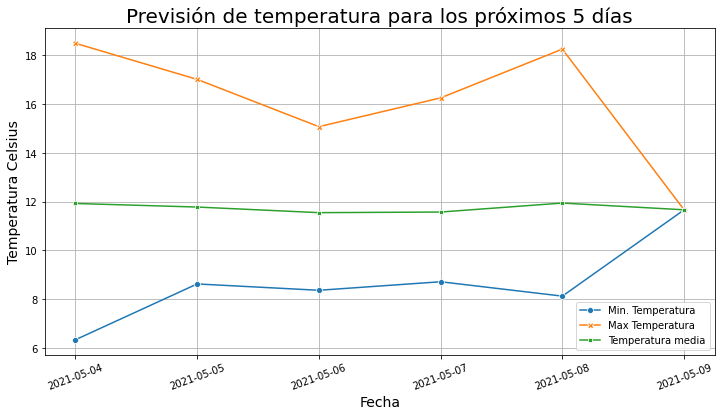

In [69]:
fig = plt.figure()
sns_plot = sns.lineplot(data=df_temp, markers=True, dashes=False)
sns_plot.set_title(f'Previsión de temperatura para los próximos 5 días', fontsize=20)
sns_plot.set_xlabel('Fecha', fontsize=14)
sns_plot.set_ylabel('Temperatura Celsius', fontsize=14)
sns_plot.set_xticklabels(df_temp.index, rotation=20)
sns_plot.grid(True)

sns_plot.legend(labels=['Min. Temperatura', 'Max Temperatura', 'Temperatura media'])
fig.set_size_inches(12, 6)

temperature_plot = f"{city.split(',')[0].replace(' ','_')}_temperatura.png"
sns_plot.figure.savefig(temperature_plot, 
                  dpi=300, facecolor='w', 
                  orientation='portrait',
                  bbox_inches='tight')

## 2.2 Grafico de humedad, lluvia y nubes
En esta gráfica vamos a agregar los datos sobre pluviometría y humedad.

In [70]:
# Creamos un marco de datos con el volumen total esperado de lluvia cada día
df_rain_per_day = df.resample('D', on='datetime').sum()[['rain_vol']]
df_rain_per_day.index = df_rain_per_day.index.date
df_rain_per_day

rain_vol
2021-05-04      0.68
2021-05-05      4.43
2021-05-06      8.40
2021-05-07     16.51
2021-05-08      8.97
2021-05-09      8.70

In [71]:
df_mean

clouds   humidity      temp  temp_max  temp_min  rain_vol
2021-05-04  57.571429  69.571429  11.92000  11.92000  11.19000  0.097143
2021-05-05  91.625000  81.000000  11.77375  11.77375  11.77375  0.553750
2021-05-06  85.875000  82.000000  11.54375  11.54375  11.54375  1.050000
2021-05-07  91.875000  83.125000  11.56875  11.56875  11.56875  2.063750
2021-05-08  83.750000  81.625000  11.93750  11.93750  11.93750  1.121250
2021-05-09  97.000000  89.000000  11.66000  11.66000  11.66000  8.700000

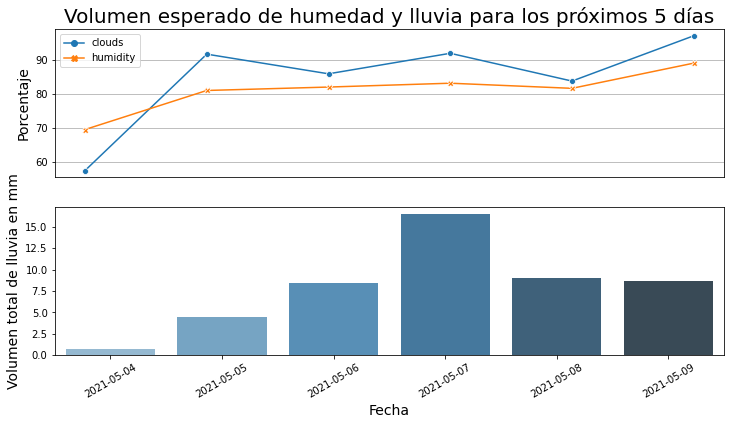

In [76]:
fig = plt.figure()

# Grafico de líneas para humedad y nubes
ax1 = fig.add_subplot(211)
ax1 = sns.lineplot(data=df_mean[['clouds', 'humidity']], markers=True, dashes=False)
ax1.set_xticks([])
ax1.set_title(f'Volumen esperado de humedad y lluvia para los próximos 5 días', fontsize=20)
ax1.set_ylabel('Porcentaje', fontsize=14)
ax1.grid(True)

# Grafico de barras para el total de lluvia por dia
ax2 = fig.add_subplot(212)
ax2 = sns.barplot(x=df_rain_per_day.index, y='rain_vol', 
                  data=df_rain_per_day,
                  palette="Blues_d")
ax2.set_xticklabels(df_temp.index, rotation=30)
ax2.set_ylabel('Volumen total de lluvia en mm', fontsize=14)
ax2.set_xlabel('Fecha', fontsize=14)
fig.set_size_inches(12, 6)

rain_humidity_plot = f"{city.split(',')[0].replace(' ','_')}_humedad_lluvia.png"
fig.savefig(rain_humidity_plot, 
              dpi=300, facecolor='w', 
              orientation='portrait',
              bbox_inches='tight')

# 3 Creamos el reporte del clima
En esta parte vamos a utilizar una plantilla HTML simple para crear nuestro informe final, agregando información sobre la ciudad elegida y las celdas generadas anteriormente.

In [77]:
# Definición de la fecha de inicio y finalización del análisis
today = str(df_mean.index.min()).replace('-', '/')
last_day = str(df_mean.index.max()).replace('-', '/')

In [78]:
# Template de HTML para añadir nuestra informacion y graficas
report_template = f'''
<!DOCTYPE html>
    <html>
      <head>
        <meta charset='utf-8'>
        <title>Weather Forecast with PyOWM</title>
        <link rel='stylesheet' href='report.css'>
          <style>
          h1 {{
          font-family: Arial;
          font-size: 300%;
          }}
          h2 {{
          font-family: Arial;
          font-size: 200%;
          }}
          @page {{
          size: 7in 9.25in;
          margin: 27mm 16mm 27mm 16mm;
          }}
          </style>                       
      </head>
      <h1 align="center">Prediccion del clima de {city}</h1>
      <h2 align="center">Fecha Inicial: {today}</h2>
      <h2 align="center">Fecha Final: {last_day}</h2>
        
      <figure>
        <img src="{temperature_plot}" width="1200" height="600">
      </figure>
      <figure>
        <img src="{rain_humidity_plot}" width="1200" height="600">
      </figure>      
    </html>
'''

In [79]:
# Guardamos nuestro HTML en un archivo
html_report = f"{city.split(',')[0].replace(' ','_')}_reporte.html"
with open(html_report, "w") as r:
    r.write(report_template)

In [ ]:
import pdfkit
path_wkthmltopdf = b'C:\Program Files\wkhtmltopdf\\bin\wkhtmltopdf.exe'
config = pdfkit.configuration(wkhtmltopdf=path_wkthmltopdf)
pdfkit.from_url("http://google.com", "rajul-url.pdf", configuration=config)
pdfkit.from_file("output.xml","rajul-pdf.pdf", configuration=config)

# Usamos pdfkit para crear el pdf del reporte
pdfkit.from_file(html_report, f"{city.split(',')[0].replace(' ', '_')}_reporte_clima_de.pdf")